# Histogram Equalization With Our Own Function 

Normalde openCv kütüphanesinde hazır bulunan Histogram Eşitleme fonksiyonu var. Fakat konuyu daha iyi anlamak için fonksiyonu manuel olarak kendimiz yazmak istersek:

In [111]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Histogram Eşitlemenin dönüşüm fonksiyonunu kendimiz yazabilmek için elde etmemiz gereken ilk şey fotoğrafımızaki piksellerin olasılık dağılımlarını bulmaktır.Fotoğrafımızdaki piksellerin olasılık dağılımı bize normalleştirilmiş histogramı verir. Önce fotoğramızın normalleştirilmemiş histogramını bulmamız gerekiyor. Ardından bu histogramı denkleştirdiğimiz zaman artık piksellerin olasılık dağılımını (probablity distrubtion) bulmuş olacağız.

In [112]:
image= cv2.imread("sunflower.jpg",0)

In [113]:
def create_image_histogram(image, L):
    histogram, bins= np.histogram(image, bins=L, range=(0,L))
    return histogram
    

In [114]:
def main():
    L= 2**8
    image= cv2.imread("sunflower.jpg",0)
    histogram = create_image_histogram(image,L)
    print(histogram)
    print(histogram.shape)

In [115]:
def create_normalized_histogram(image,histogram):
    L=2**8
    histogram = create_image_histogram(image,L)
    return histogram/image.size

In [116]:
def main2():
    L=2**8
    histogram = create_image_histogram(image,L)
    normalized_histogram= create_normalized_histogram(image,histogram)
    print(normalized_histogram)
    print(normalized_histogram.shape)
    print(normalized_histogram.sum())
    cumsum_dist= cumsum(normalized_histogram)
    print(60*"-")
    print(cumsum_dist)
    hist_eq_image=histogram_equalization(image,cumsum_dist,L)
    
    side_by_side= np.hstack((image,hist_eq_image))
    plt.imshow(side_by_side, cmap="gray")
    plt.show()

Artık elde ettiğimiz normalleştirilmiş histogram değerlerinin kümülatif toplamlarını elde etmemiz gerkiyor.

In [117]:


def cumsum(normalized_histogram):
    return np.cumsum(normalized_histogram)
       

In [118]:
def histogram_equalization(image,cumsum_dist,L):
    transformation_func= (L-1)*cumsum_dist
    shape= image.shape
    ravel= image.ravel() #fotoğrafı tek boyuta indirgemek:
    hist_eq_image= np.zeros_like(ravel)
    
    for i, pixel in enumerate(ravel):
        hist_eq_image[i]=transformation_func[pixel]
        
    return hist_eq_image.reshape(shape).astype(np.uint8)
        
       
    

In [119]:
if __name__=="__main__":
    

IndentationError: expected an indented block (701983480.py, line 2)

Arrayin içindeki 256 adet değer var. Bu değerler neyi simgeliyor?
İlk indexte olan 346 değeri yoğunluk değeri 0 olan pixel sayısının 346 olduğunu gösterir. Ya da pisel değeri 1 olan pksellerin sayısı 79'dur. İndex numarasının değerine sahip kaç adet piksel olduğunun bilgsini veriyor.
   

In [120]:
main()
    

[  346    79    71    83   120   109   121   140   129   174   178   178
   211   227   261   310   369   346   411   425   473   532   591   640
   745   739   872   963   988  1090  1089  1279  1255  1380  1316  1329
  1361  1357  1413  1331  1385  1354  1314  1324  1290  1263  1280  1272
  1242  1188  1177  1100  1086  1051   990   996   941   914   934   862
   816   825   745   724   761   728   732   683   739   695   771   727
   744   757   824   837  1109  2282  6901 26105 38302 36970 36090 29151
 28056 35834 38574 40588 41882 38303 34415 31526 26010 24959 26581 27666
 29232 26785 17687 11343  5356  2938  2576  2354  2438  2321  2252  2269
  2191  2215  2170  2141  2289  2192  2254  2299  2346  2368  2393  2362
  2484  2463  2613  2657  2585  2811  2903  3008  2933  2976  3055  3054
  3202  3072  3171  3146  3234  3277  3381  3270  3200  3203  2984  3006
  2731  2786  2736  2742  2552  2610  2650  2532  2402  2393  2342  2362
  2199  2151  2187  2024  2079  2009  1976  1904  1

Main2 fonksiyonunda ise;

Burada görülen değerler bulunduğu indexteki değerin bu fotoğraf içinde bulunma olasılıklarını bize dödürdü. Eğer bu 256 değer bulunan matrisin değerlerini toplarsak toplamın 1 olduğunu görürüz.

[3.44484269e-04 7.86539227e-05 7.06889685e-05 8.26363998e-05
 1.19474313e-04 1.08522501e-04 1.20469932e-04 1.39386699e-04
 1.28434886e-04 1.73237754e-04 1.77220231e-04 1.77220231e-04
 2.10075667e-04 2.26005575e-04 2.59856631e-04 3.08641975e-04
 3.67383513e-04 3.44484269e-04 4.09199522e-04 4.23138192e-04
 4.70927917e-04 5.29669454e-04 5.88410992e-04 6.37196336e-04
 7.41736360e-04 7.35762644e-04 8.68180008e-04 9.58781362e-04
 9.83671844e-04 1.08522501e-03 1.08422939e-03 1.27339705e-03
 1.24950219e-03 1.37395460e-03 1.31023497e-03 1.32317802e-03
 1.35503783e-03 1.35105536e-03 1.40681004e-03 1.32516926e-03
 1.37893270e-03 1.34806850e-03 1.30824373e-03 1.31819992e-03
 1.28434886e-03 1.25746714e-03 1.27439267e-03 1.26642772e-03
 1.23655914e-03 1.18279570e-03 1.17184389e-03 1.09518120e-03
 1.08124253e-03 1.04639586e-03 9.85663082e-04 9.91636798e-04
 9.36877738e-04 9.09996018e-04 9.29908403e-04 8.58223815e-04
 8.12425329e-04 8.21385902e-04 7.41736360e-04 7.20828355e-04
 7.57666268e-04 7.248108

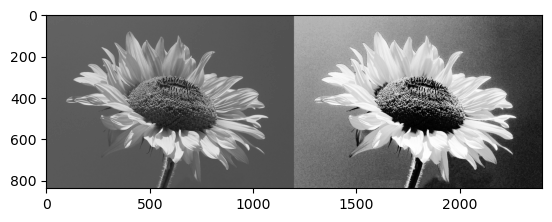

In [121]:
 main2()